# WINE CLASSIFICATION PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [30]:
wine_data=load_wine()
df_x_train=pd.DataFrame(X_train,columns=wine_data.feature_names)

### DATA UNDERSTANDING

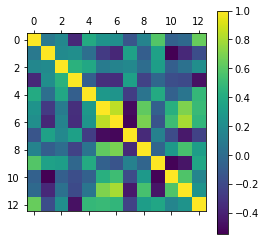

In [31]:
#plotting a graph to understand data
plt.matshow(df_x_train.corr())
plt.colorbar()
plt.show()

### DATA PREPARATION
Transforming raw data that was collected into a form that can be used for modeling.

In [4]:
#training dataset
X_train,X_test,y_train,y_test=train_test_split(wine_data.data,wine_data.target,test_size=0.5,random_state=42)

In [32]:
df_x_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0
1,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0
2,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0
3,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0
4,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0


In [6]:
#describing and formatting data to five decimal places
#feature identification
df_x_train.describe().style.format("{:.5f}")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000
mean,12.96011,2.43472,2.37000,19.69551,99.68539,2.30393,2.00202,0.37360,1.57461,5.16461,0.94467,2.54899,730.85393
std,0.87890,1.10208,0.25634,3.63005,13.33536,0.67975,1.04548,0.13405,0.56620,2.32526,0.23536,0.73836,306.43302
min,11.03000,0.89000,1.36000,10.60000,70.00000,1.10000,0.47000,0.13000,0.42000,1.74000,0.48000,1.27000,278.00000
25%,12.29000,1.64000,2.25000,18.00000,88.00000,1.70000,1.20000,0.26000,1.25000,3.21000,0.78000,1.75000,495.00000
50%,12.96000,1.97000,2.38000,20.00000,100.00000,2.20000,1.84000,0.37000,1.53000,5.00000,0.95000,2.77000,630.00000
75%,13.72000,3.26000,2.54000,22.00000,108.00000,2.88000,2.89000,0.48000,1.87000,6.75000,1.08000,3.16000,920.00000
max,14.83000,5.65000,3.23000,30.00000,139.00000,3.88000,5.08000,0.66000,3.58000,10.80000,1.71000,3.71000,1547.00000


Feature Scaling: To have a same scale for the smallest and largest value for a given feature.

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.29763036,  1.30971359,  0.11769613, ...,  1.04824751,
         0.79134959, -0.87905518],
       [-1.28167477, -1.40957746,  0.82387293, ..., -0.66090388,
         0.72324853, -0.69198999],
       [ 1.44161091,  1.41921525,  0.54924862, ..., -0.23361603,
         1.33615805,  0.09565289],
       ...,
       [ 1.62468894, -0.51531396,  0.03923204, ...,  1.0909763 ,
         0.61428684,  2.67846516],
       [-0.30907274, -0.82556864, -0.43155249, ...,  0.06548546,
        -0.66601304, -0.77403613],
       [-0.70955593,  0.01394403,  0.3530884 , ..., -0.61817509,
         1.13185488, -0.96110131]])

In [49]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

### IMPLEMENTING THREE CLASSIFICATION MODELS

In [9]:
#Performing comparative study on three classification models in order to choose most suitable model

##### Implementing Naive Bayes Model

In [24]:
pipe=make_pipeline(GaussianNB())
pipe.fit(X_train,y_train)

Pipeline(steps=[('gaussiannb', GaussianNB())])

In [25]:
pipe.score(X_train,y_train),pipe.score(X_test,y_test)

(0.9775280898876404, 0.9887640449438202)

In [26]:
#evaluation
confusion_matrix(y_test,pipe.predict(X_test))

array([[32,  1,  0],
       [ 0, 34,  0],
       [ 0,  0, 22]], dtype=int64)

##### Implementing SVM Model

In [14]:
pipe=make_pipeline(svm.SVC())
pipe.fit(X_train,y_train)

Pipeline(steps=[('svc', SVC())])

In [15]:
pipe.score(X_train,y_train),pipe.score(X_test,y_test)

(0.7640449438202247, 0.651685393258427)

In [16]:
#evaluation
confusion_matrix(y_test,pipe.predict(X_test))

array([[28,  0,  5],
       [ 1, 23, 10],
       [ 0, 15,  7]], dtype=int64)

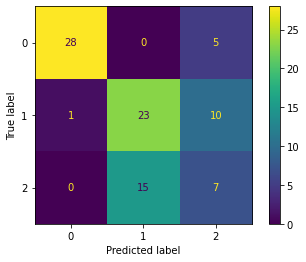

In [23]:
#visualization
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

##### Implementing Logistic Regression

In [34]:
pipe=make_pipeline(linear_model.LogisticRegression())
pipe.fit(X_scaled,y_train) #using scaled data here

Pipeline(steps=[('logisticregression', LogisticRegression())])

In [19]:
pipe.score(X_train,y_train),pipe.score(X_test,y_test)

(0.29213483146067415, 0.3707865168539326)

In [35]:
#evaluation
confusion_matrix(y_test,pipe.predict(X_test))

array([[33,  0,  0],
       [34,  0,  0],
       [22,  0,  0]], dtype=int64)